In [1]:
from imports import *
import wrangle

In [2]:
df = wrangle.wrangle_df()

cached csv


In [3]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive,cross,...,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,0.009437,3.630005,0.009482,1,0.0,...,False,False,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,-0.008620,-3.317016,-0.008583,0,0.0,...,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,-0.066750,-24.740998,-0.064571,0,0.0,...,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900,-0.000201,-0.071991,-0.000201,0,0.0,...,False,False,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700,-0.031391,-11.074005,-0.030903,0,0.0,...,False,False,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2014-10-20 to 2022-05-24
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2774 non-null   float64
 1   high                          2774 non-null   float64
 2   low                           2774 non-null   float64
 3   close                         2774 non-null   float64
 4   volume                        2774 non-null   int64  
 5   fwd_log_ret                   2774 non-null   float64
 6   fwd_ret                       2774 non-null   float64
 7   fwd_pct_chg                   2774 non-null   float64
 8   fwd_close_positive            2774 non-null   int64  
 9   cross                         2774 non-null   float64
 10  histy                         2774 non-null   float64
 11  month_9                       2774 non-null   int64  
 12  month_10                      2774 non-null 

In [5]:
df.index

DatetimeIndex(['2014-10-20', '2014-10-21', '2014-10-22', '2014-10-23',
               '2014-10-24', '2014-10-25', '2014-10-26', '2014-10-27',
               '2014-10-28', '2014-10-29',
               ...
               '2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', length=2774, freq=None)

In [6]:
# Splits
def split_i(df):
    train = df.loc[:'2022-3-22']
    validate =df.loc['2022-03-23':'2022-04-23'] 
    return train, validate

def split_ii(df):
    train = df.loc[:'2022-04-24']
    test = df.loc['2022-04-25':]
    return train, test

In [7]:
df = df.drop(columns=['fwd_ret', 'fwd_pct_chg'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2014-10-20 to 2022-05-24
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2774 non-null   float64
 1   high                          2774 non-null   float64
 2   low                           2774 non-null   float64
 3   close                         2774 non-null   float64
 4   volume                        2774 non-null   int64  
 5   fwd_log_ret                   2774 non-null   float64
 6   fwd_close_positive            2774 non-null   int64  
 7   cross                         2774 non-null   float64
 8   histy                         2774 non-null   float64
 9   month_9                       2774 non-null   int64  
 10  month_10                      2774 non-null   int64  
 11  day_20                        2774 non-null   int64  
 12  day_1                         2774 non-null 

In [9]:
train_i, validate_i = split_i(df)
train_ii, test_ii = split_ii(df)

In [10]:
# Scaling our continuous variables
quants = [
        'open', 'high', 'low', 'close', 'volume', 'avg-fees-per-transaction', 'cost-per-transaction-percent', 
        'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners'
         ]
scaler = MinMaxScaler()
scaler.fit(train_i[quants])

train_i[quants] = scaler.transform(train_i[quants])
validate_i[quants] = scaler.transform(validate_i[quants])

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/895409176.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_i[quants] = scaler.transform(train_i[quants])
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/895409176.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_i[quants] = scaler.transform(validate_i[quants])


In [11]:
train_i.tail()

,open,high,low,close,volume,fwd_log_ret,fwd_close_positive,cross,histy,month_9,...,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2022-03-18,0.605109,0.612209,0.606110,0.617656,0.098059,0.009275,1,0.0,1.0,0,...,False,False,False,0.024546,0.068855,0.469100,0.984022,0.876603,0.560381,0.019501
2022-03-19,0.617723,0.613971,0.625749,0.623436,0.056013,-0.022600,0,0.0,1.0,0,...,False,False,False,0.022731,0.068855,0.555931,0.984022,0.876603,0.574654,0.015684
2022-03-20,0.623612,0.612871,0.616718,0.609445,0.057332,-0.004126,0,0.0,1.0,0,...,False,False,False,0.022731,0.068855,0.555931,0.981582,0.846902,0.574654,0.015684
2022-03-21,0.609582,0.601399,0.611633,0.606925,0.070119,0.030704,1,0.0,1.0,0,...,False,False,False,0.022731,0.069735,0.555931,0.981582,0.846902,0.574654,0.015684
2022-03-22,0.607028,0.625755,0.615865,0.625931,0.091173,0.012531,1,0.0,1.0,0,...,False,False,False,0.028518,0.069735,0.495545,0.981582,0.846902,0.560344,0.021433


In [12]:
df.loc['2022-3-22']

open                                41074.105469
high                                43124.707031
low                                  40948.28125
close                               42358.808594
volume                               32004652376
fwd_log_ret                             0.012531
fwd_close_positive                             1
cross                                        0.0
histy                                        1.0
month_9                                        0
month_10                                       0
day_20                                         0
day_1                                          0
day_9                                          0
atr_above_threshold_0.01                   False
atr_above_threshold_0.05                   False
atr_above_threshold_0.1                    False
atr_above_threshold_0.2                    False
atr_above_threshold_0.3                    False
avg-fees-per-transaction                1.735049
cost-per-transaction

In [13]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_close_positive,cross,histy,month_9,...,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,0.009437,1,0.0,1.0,0,...,False,False,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,-0.008620,0,0.0,1.0,0,...,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,-0.066750,0,0.0,1.0,0,...,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900,-0.000201,0,0.0,1.0,0,...,False,False,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700,-0.031391,0,0.0,1.0,0,...,False,False,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933


In [14]:
train_i.head()

,open,high,low,close,volume,fwd_log_ret,fwd_close_positive,cross,histy,month_9,...,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,0.003152,0.002601,0.003122,0.003038,0.000028,0.009437,1,0.0,1.0,0,...,False,False,False,0.000515,0.471785,0.070693,0.0,0.00000,0.014976,0.000062
2014-10-21,0.003051,0.002638,0.003161,0.003092,0.000022,-0.008620,0,0.0,1.0,0,...,False,False,False,0.000534,0.471785,0.055068,0.0,0.00000,0.017207,0.000134
2014-10-22,0.003105,0.002579,0.003183,0.003043,0.000015,-0.066750,0,0.0,1.0,0,...,False,False,False,0.000534,0.471785,0.055068,0.0,0.00026,0.017207,0.000134
2014-10-23,0.003059,0.002527,0.002793,0.002676,0.000057,-0.000201,0,0.0,1.0,0,...,False,False,False,0.000534,0.423688,0.055068,0.0,0.00026,0.017207,0.000134
2014-10-24,0.002697,0.002225,0.002746,0.002675,0.000026,-0.031391,0,0.0,1.0,0,...,False,False,False,0.000461,0.423688,0.050239,0.0,0.00026,0.012914,0.000091


In [15]:
train_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2711 entries, 2014-10-20 to 2022-03-22
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2711 non-null   float64
 1   high                          2711 non-null   float64
 2   low                           2711 non-null   float64
 3   close                         2711 non-null   float64
 4   volume                        2711 non-null   float64
 5   fwd_log_ret                   2711 non-null   float64
 6   fwd_close_positive            2711 non-null   int64  
 7   cross                         2711 non-null   float64
 8   histy                         2711 non-null   float64
 9   month_9                       2711 non-null   int64  
 10  month_10                      2711 non-null   int64  
 11  day_20                        2711 non-null   int64  
 12  day_1                         2711 non-null 

In [16]:
validate_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2022-03-23 to 2022-04-23
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          32 non-null     float64
 1   high                          32 non-null     float64
 2   low                           32 non-null     float64
 3   close                         32 non-null     float64
 4   volume                        32 non-null     float64
 5   fwd_log_ret                   32 non-null     float64
 6   fwd_close_positive            32 non-null     int64  
 7   cross                         32 non-null     float64
 8   histy                         32 non-null     float64
 9   month_9                       32 non-null     int64  
 10  month_10                      32 non-null     int64  
 11  day_20                        32 non-null     int64  
 12  day_1                         32 non-null     

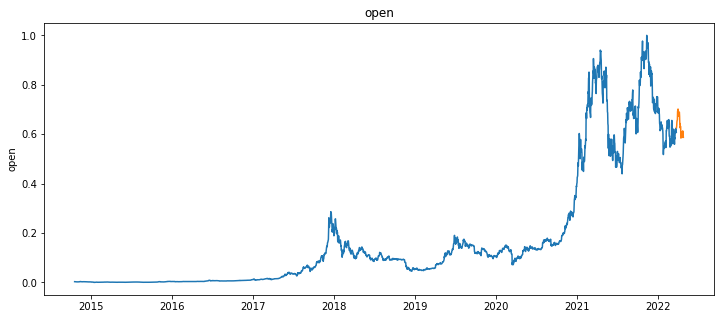

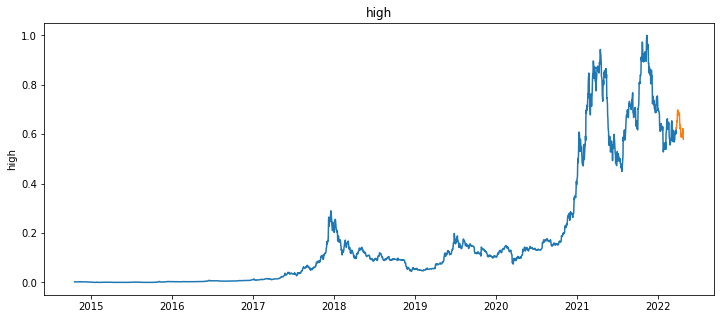

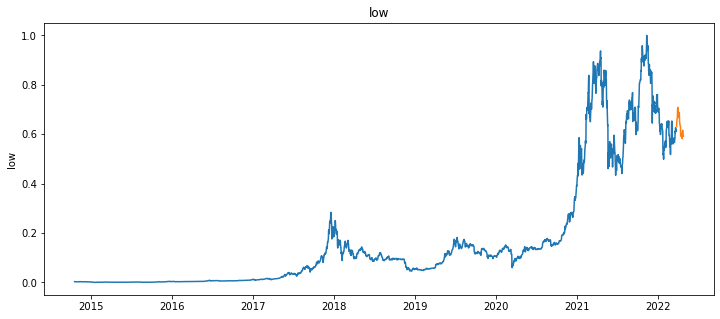

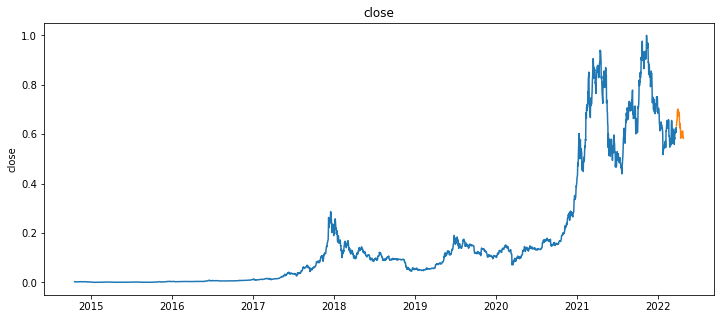

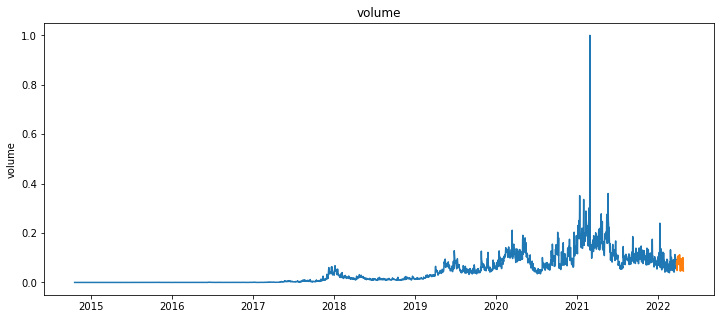

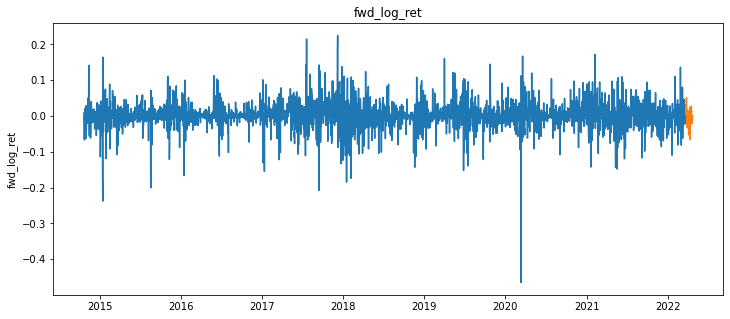

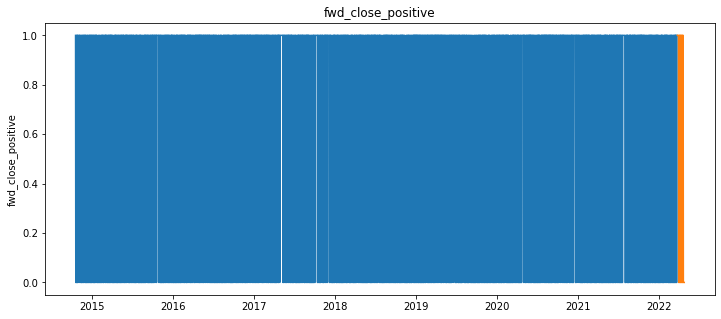

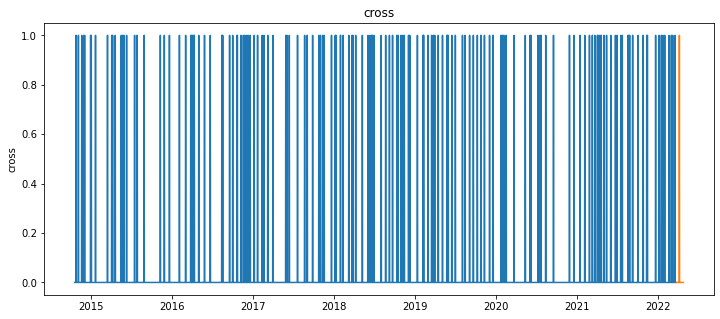

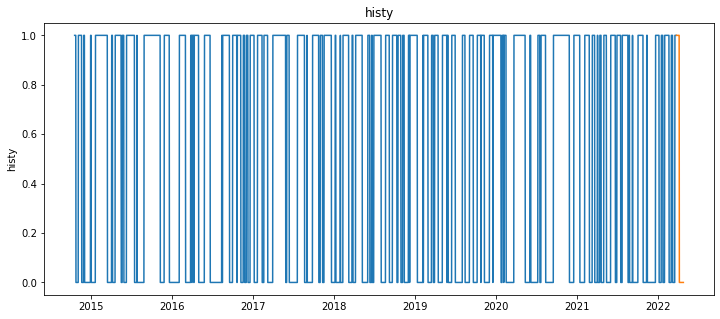

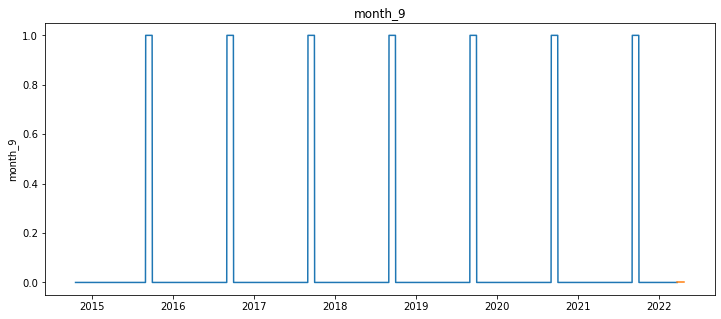

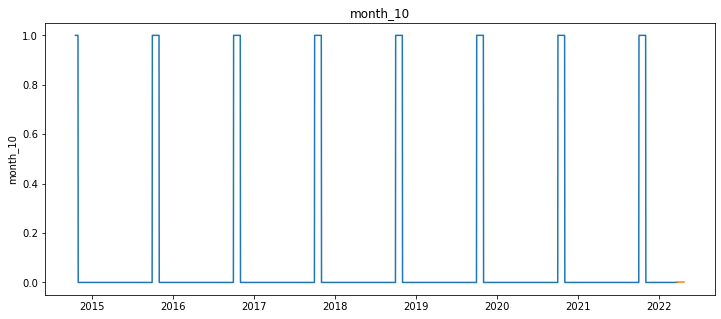

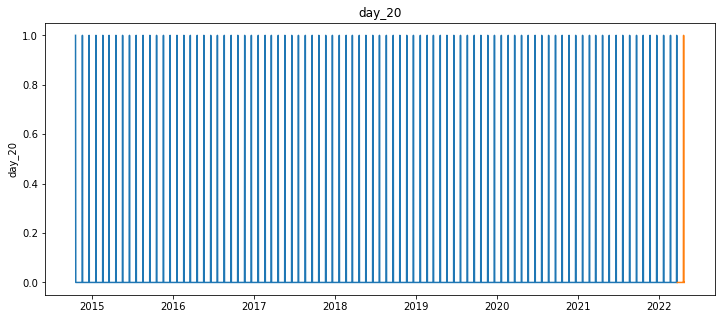

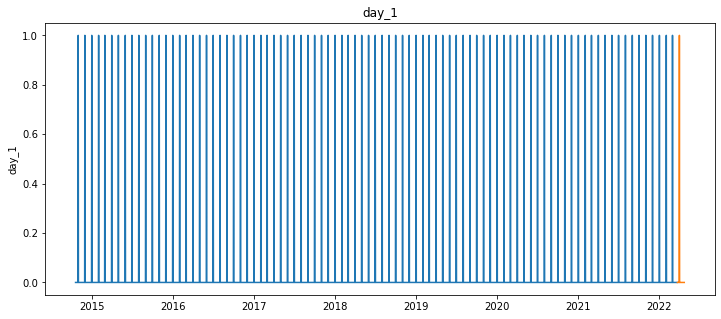

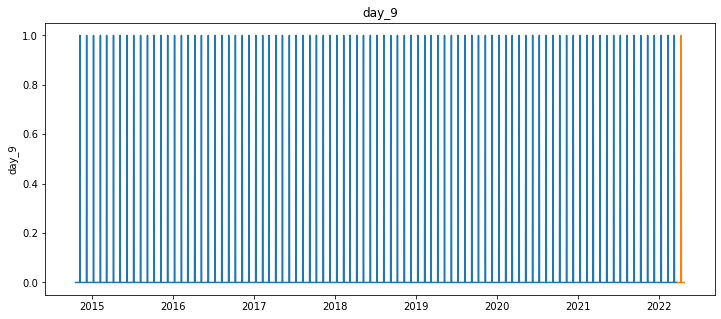

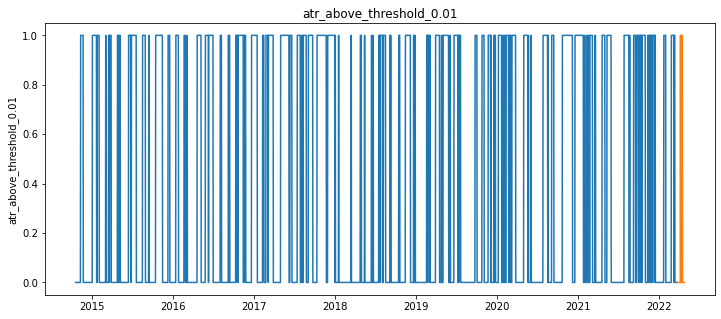

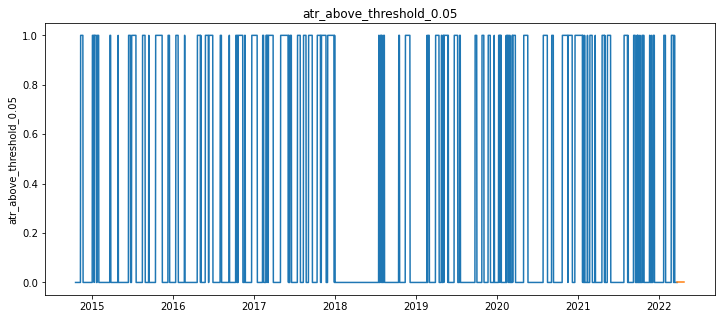

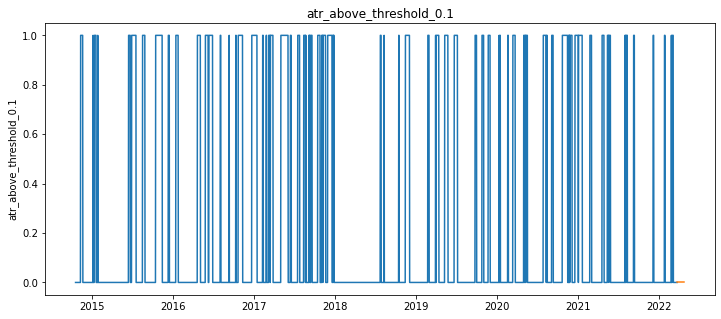

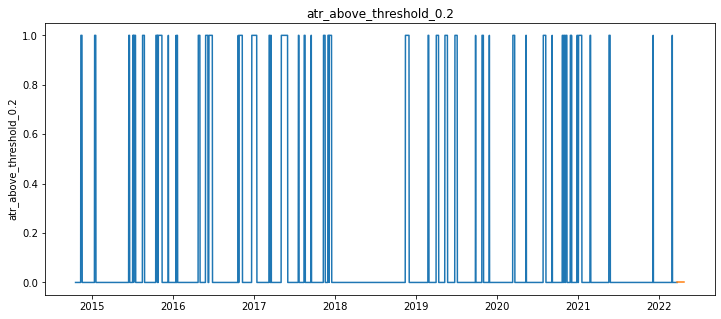

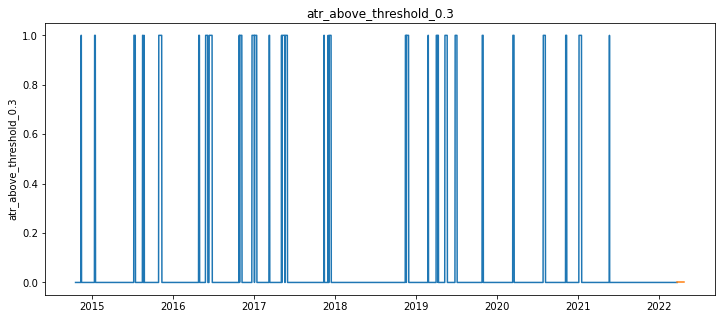

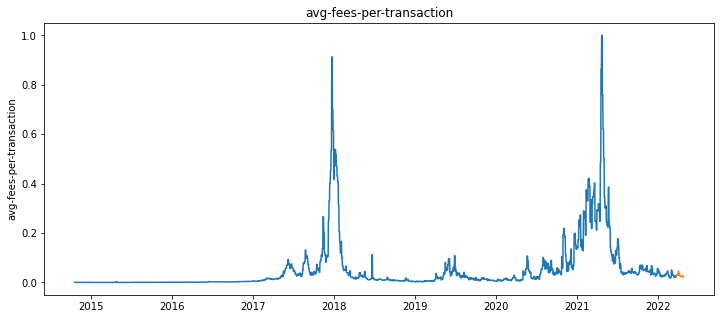

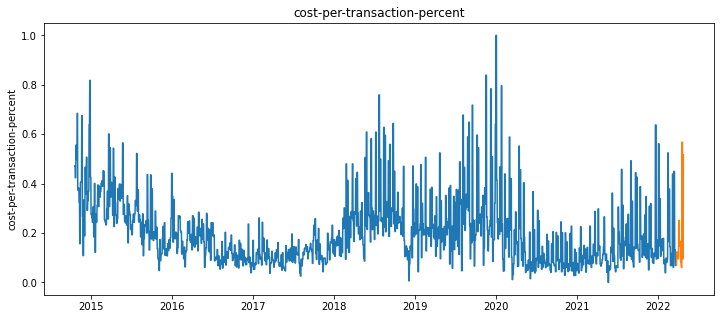

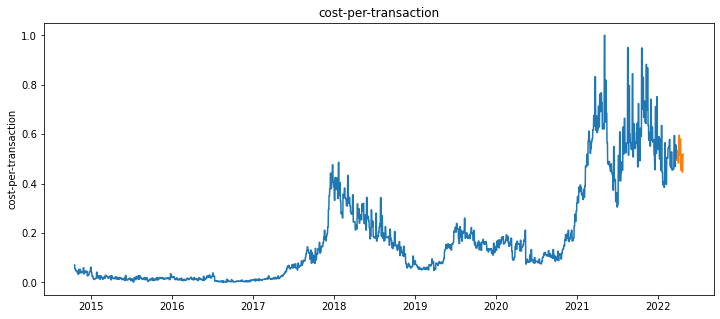

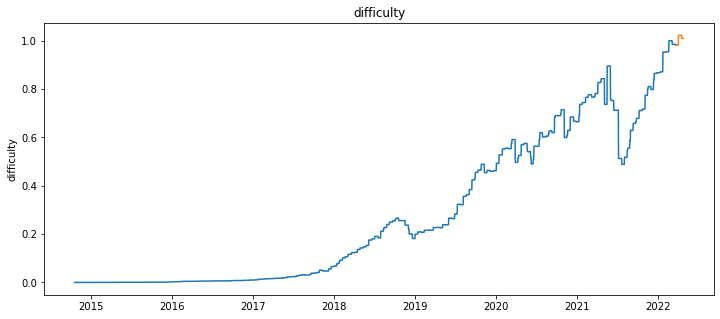

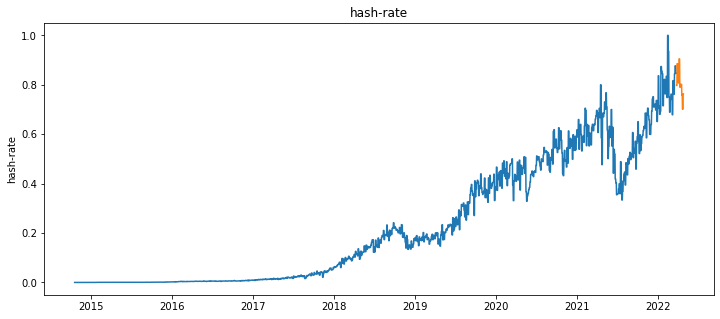

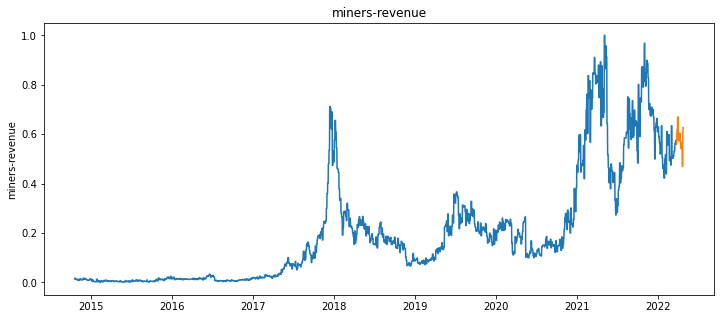

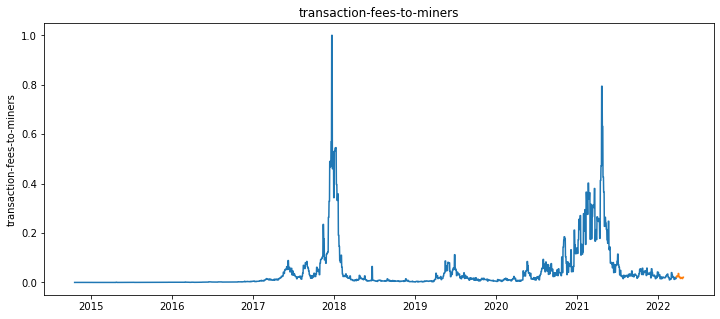

In [17]:
for col in train_i.columns:
    plt.figure(figsize=(12,5))
    plt.plot(train_i[col])
    plt.plot(validate_i[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [18]:
# Evaluate function
def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [19]:
# Plot and eval function
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [20]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [21]:
import statsmodels.api as sm
from statsmodels.tsa.api import Holt

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [23]:
train_i.head()

,open,high,low,close,volume,fwd_log_ret,fwd_close_positive,cross,histy,month_9,...,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,0.003152,0.002601,0.003122,0.003038,0.000028,0.009437,1,0.0,1.0,0,...,False,False,False,0.000515,0.471785,0.070693,0.0,0.00000,0.014976,0.000062
2014-10-21,0.003051,0.002638,0.003161,0.003092,0.000022,-0.008620,0,0.0,1.0,0,...,False,False,False,0.000534,0.471785,0.055068,0.0,0.00000,0.017207,0.000134
2014-10-22,0.003105,0.002579,0.003183,0.003043,0.000015,-0.066750,0,0.0,1.0,0,...,False,False,False,0.000534,0.471785,0.055068,0.0,0.00026,0.017207,0.000134
2014-10-23,0.003059,0.002527,0.002793,0.002676,0.000057,-0.000201,0,0.0,1.0,0,...,False,False,False,0.000534,0.423688,0.055068,0.0,0.00026,0.017207,0.000134
2014-10-24,0.002697,0.002225,0.002746,0.002675,0.000026,-0.031391,0,0.0,1.0,0,...,False,False,False,0.000461,0.423688,0.050239,0.0,0.00026,0.012914,0.000091


In [24]:
# Dropping our target and all fwd columns (to avoid 'looking' into the future)
x_train_i = train_i.drop(columns=['fwd_log_ret', 'fwd_close_positive'])
x_train_ii = train_ii.drop(columns=['fwd_log_ret', 'fwd_close_positive'])

y_train_i = train_i['fwd_log_ret']
y_train_ii = train_ii['fwd_log_ret']

x_validate_i = validate_i.drop(columns=['fwd_log_ret', 'fwd_close_positive'])
x_test_ii = test_ii.drop(columns=['fwd_log_ret', 'fwd_close_positive'])

y_validate_i = validate_i['fwd_log_ret']
y_test_ii = test_ii['fwd_log_ret']

In [25]:
y_train_i = pd.DataFrame(y_train_i)
y_train_ii = pd.DataFrame(y_train_ii)

y_validate_i = pd.DataFrame(y_validate_i)
y_test_ii = pd.DataFrame(y_test_ii)

In [26]:
def baseline_selection(y_train, target):
    '''
    This function takes our train and validate y components and computes a mean and median baseline for modeling purposes. It compares their
    RMSE values and returns whichever is a better usecase. 
    '''
    # Creation of mean value and adding to our dataframes
    pred_mean = y_train[target].mean()
    y_train['pred_mean'] = pred_mean
    # Creation of median value and adding to our dataframes
    pred_median = y_train[target].median()
    y_train['pred_median'] = pred_median
    # Evaluating RMSE value for mean baseline
    rmse_train_mean = mean_squared_error(y_train[target], y_train.pred_mean)**(1/2)
    # Evaluating RMSE value for median baseline
    rmse_train_med = mean_squared_error(y_train[target], y_train.pred_median)**(1/2)

    # Determine which is better to use as baseline
    if rmse_train_mean < rmse_train_med:
        print(f'Mean provides a better baseline. Returning mean RMSE of {rmse_train_mean}.')
        return rmse_train_mean
    else: 
        print(f'Median provides a better baseline. Returning median RMSE of {rmse_train_med}.')
        return rmse_train_med

In [27]:
baseline_RMSE_i = baseline_selection(y_train_i, 'fwd_log_ret')

Mean provides a better baseline. Returning mean RMSE of 0.039188695988946885.


In [28]:
baseline_RMSE_ii = baseline_selection(y_train_ii, 'fwd_log_ret')

Mean provides a better baseline. Returning mean RMSE of 0.039041302984912506.


In [29]:
def ols_model(x_train, y_train, x_validate, y_validate, target):
    '''
    This function takes in our x and y components for train and validate and prints the results of RMSE for train and validate modeling.
    '''
    # Creation and fitting of the model
    lm = LinearRegression(normalize=True)
    lm.fit(x_train, y_train[target])
    # Prediction creation and RMSE value for train
    y_train['ret_lm_pred'] = lm.predict(x_train)
    rmse_train = round(mean_squared_error(y_train[target], y_train.ret_lm_pred)**(1/2), 6)
    # Prediction creation and RMSE for validate
    y_validate['ret_lm_pred'] = lm.predict(x_validate)
    rmse_validate = round(mean_squared_error(y_validate[target], y_validate.ret_lm_pred)**(1/2), 6)
    # Outputing the RMSE values
    print("RMSE for OLS using LinearRegression\nTraining: ", rmse_train,
            "\nValidation: ", rmse_validate)

In [30]:
ols_model(x_train_i, y_train_i, x_validate_i, y_validate_i, 'fwd_log_ret')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


RMSE for OLS using LinearRegression
Training:  0.038786 
Validation:  0.023159


In [31]:
difference = .038786 - .039041
(difference / .039041) * 100 

-0.6531594989882388

In [32]:
ols_model(x_train_ii, y_train_ii, x_test_ii, y_test_ii, 'fwd_log_ret')

RMSE for OLS using LinearRegression
Training:  0.038639 
Validation:  0.042275


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [33]:
def LassoLars_model(x_train, y_train, x_validate, y_validate, target):
    '''
    This function takes in our x and y components for train and validate and prints the results of RMSE for train and validate modeling.
    '''
    # Creation and fitting of the model
    lars = LassoLars(alpha=1.0)
    lars.fit(x_train, y_train[target])
    # Prediction creation and RMSE value for train
    y_train['ret_pred_lars'] = lars.predict(x_train)
    rmse_train = round(mean_squared_error(y_train[target], y_train.ret_pred_lars)**(1/2), 6)
    # Prediction creation and RMSE value for validate
    y_validate['ret_pred_lars'] = lars.predict(x_validate)
    rmse_validate = round(mean_squared_error(y_validate[target], y_validate.ret_pred_lars)**(1/2), 6)
    # Outputing the RMSE values
    print("RMSE for Lasso + Lars\nTraining: ", rmse_train,
     "\nValidation: ", rmse_validate)

In [34]:
LassoLars_model(x_train_i, y_train_i, x_validate_i, y_validate_i, 'fwd_log_ret')

RMSE for Lasso + Lars
Training:  0.039189 
Validation:  0.024054


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [35]:
def Tweedie_model(x_train, y_train, x_validate, y_validate, target):
    '''
    This function takes in our x and y components for train, validate and test and prints the results of RMSE for all three models. 
    '''
    # Creation and fitting of the model
    glm = TweedieRegressor(power=1, alpha=0)
    glm.fit(x_train, y_train[target])
    # Prediction creation and RMSE value for train
    y_train['ret_pred_glm'] = glm.predict(x_train)
    rmse_train = round(mean_squared_error(y_train[target], y_train.ret_pred_glm)**(1/2), 6)
    # Prediction creation and RMSE value for validate
    y_validate['ret_pred_glm'] = glm.predict(x_validate)
    rmse_validate = round(mean_squared_error(y_validate[target], y_validate.ret_pred_glm)**(1/2), 6)
    # Outputing the RMSE values
    print("RMSE using Tweedie, power=1 & alpha=0\nTraining: ", rmse_train,
     "\nValidation: ", rmse_validate)

In [36]:
# Did not find a resolution regarding this error, but moving on to classification modeling
# Tweedie_model(x_train_i, y_train_i, x_validate_i, y_validate_i, 'fwd_log_ret')

Given that we are looking for an active day-to-day trading approach it makes sense to see if there is a benefit to classification modeling. The above few regression models did not perform that well and for the specific problem are are trying to answer that is not all that surprising. 

In [37]:
# math
from scipy import stats
import statistics
import math

# sklearn suite
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import export_graphviz, export_text
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

For now will use the same splitting technique but will modify the x/y splits with y being fwd_close_positive boolean

In [38]:
# Dropping our target and all fwd columns (to avoid 'looking' into the future)
x_train_i = train_i.drop(columns=['fwd_log_ret', 'fwd_close_positive'])
x_train_ii = train_ii.drop(columns=['fwd_log_ret', 'fwd_close_positive'])

y_train_i = train_i['fwd_close_positive']
y_train_ii = train_ii['fwd_close_positive']

x_validate_i = validate_i.drop(columns=['fwd_log_ret', 'fwd_close_positive'])
x_test_ii = test_ii.drop(columns=['fwd_log_ret', 'fwd_close_positive'])

y_validate_i = validate_i['fwd_close_positive']
y_test_ii = test_ii['fwd_close_positive']

In [39]:
# Create empty df to store results
results = pd.DataFrame(columns=['model_num', 'metric', 'sample_type', 'score'])
model_info = pd.DataFrame(columns=['model_num', 'features'])
model_number = 0

In [40]:
y_train_i = pd.DataFrame(y_train_i)
y_train_ii = pd.DataFrame(y_train_ii)

y_validate_i = pd.DataFrame(y_validate_i)
y_test_ii = pd.DataFrame(y_test_ii)

In [41]:
# Baseline for the classification models
y_train_i.fwd_close_positive.mean()

0.5422353375138326

In [42]:
target = 'fwd_close_positive'

In [43]:
# Random Forest
results = pd.DataFrame()
for depth in range(1, 10):
    for min_sample_leaf in range(1,5):
        # Make model
        model = RandomForestClassifier(max_depth = depth, min_samples_leaf = min_sample_leaf,random_state = 123)
        # Fit model
        model = model.fit(x_train_i, y_train_i)
        # Eval
        accuracy = model.score(x_train_i, y_train_i)
        # Store stats
        stats = pd.Series({'max_depth': depth,
                          'min_samples_leaf': min_sample_leaf,
                          'accuracy': accuracy})
        results = pd.concat([results,stats], axis=1)

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)
/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/3423793451.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

In [44]:
results = results.T.reset_index(drop=True)

In [45]:
results.iloc[results.accuracy.nlargest(n=5).index]

,max_depth,min_samples_leaf,accuracy
32,9.0,1.0,0.793065
33,9.0,2.0,0.777942
34,9.0,3.0,0.759867
28,8.0,1.0,0.756916
35,9.0,4.0,0.748801


In [46]:
model = RandomForestClassifier(max_depth = 9, min_samples_leaf = 1, random_state=123)
model = model.fit(x_train_i, y_train_i)
accuracy_v = model.score(x_validate_i, y_validate_i)
accuracy_v

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/744647541.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)


0.46875

In [47]:
model = RandomForestClassifier(max_depth = 9, min_samples_leaf = 2, random_state=123)
model = model.fit(x_train_i, y_train_i)
accuracy_v = model.score(x_validate_i, y_validate_i)
accuracy_v

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_17205/2460183190.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train_i, y_train_i)


0.4375

In [48]:
# LogisticRegression
results2 = pd.DataFrame()
solvers = {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}

for solver in solvers:
    # Build model
    model = LogisticRegression(random_state=123, solver=solver)
    # Fit on train
    model.fit(x_train_i, y_train_i)
    # Eval
    accuracy_t = model.score(x_train_i, y_train_i)
    accuracy_v = model.score(x_validate_i, y_validate_i)
    # Store stats
    stats = pd.Series({'solver': solver,
                      'accuracy_t': accuracy_t,
                      'accuracy_v': accuracy_v})
    results2 = pd.concat([results2, stats], axis=1)
    
results2 = results2.T.reset_index(drop=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [49]:
results2

,solver,accuracy_t,accuracy_v
0,newton-cg,0.566581,0.53125
1,sag,0.566581,0.53125
2,saga,0.566581,0.53125
3,liblinear,0.566581,0.5625
4,lbfgs,0.566581,0.53125


In [50]:
# Decision Tree
results3 = pd.DataFrame()
for depth in range(1, 10):
    for min_sample_leaf in range(1,5):
        # Make model
        model = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = min_sample_leaf,random_state = 123)
        # Fit model
        model = model.fit(x_train_i, y_train_i)
        # Eval
        accuracy_t = model.score(x_train_i, y_train_i)
        accuracy_v = model.score(x_validate_i, y_validate_i)
        # Store stats
        stats = pd.Series({'max_depth': depth,
                          'min_samples_leaf': min_sample_leaf,
                          'accuracy_t': accuracy_t,
                          'accuracy_v': accuracy_v})
        results3 = pd.concat([results3,stats], axis=1)
results3 = results3.T.reset_index(drop=True)

In [51]:
results3

,max_depth,min_samples_leaf,accuracy_t,accuracy_v
0,1.0,1.0,0.551826,0.53125
1,1.0,2.0,0.551826,0.53125
2,1.0,3.0,0.551826,0.53125
3,1.0,4.0,0.551826,0.53125
4,2.0,1.0,0.564367,0.53125
5,2.0,2.0,0.564367,0.53125
6,2.0,3.0,0.564367,0.53125
7,2.0,4.0,0.564367,0.53125
8,3.0,1.0,0.575433,0.37500
9,3.0,2.0,0.575433,0.37500


In [52]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform')

In [53]:
knn.fit(x_train_i, y_train_i)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [54]:
y_pred = knn.predict(x_train_i)

In [55]:
y_pred_proba = knn.predict_proba(x_train_i)

In [56]:
accuracy_k = knn.score(x_train_i, y_train_i)

In [57]:
accuracy_k

0.6923644411656216

In [58]:
print(classification_report(y_train_i, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1241
           1       0.70      0.76      0.73      1470

    accuracy                           0.69      2711
   macro avg       0.69      0.69      0.69      2711
weighted avg       0.69      0.69      0.69      2711



In [59]:
accuracy_k_v = knn.score(x_validate_i, y_validate_i)

In [60]:
accuracy_k_v

0.46875

In [61]:
# Best performance was a LogisticRegression model
results_test = pd.DataFrame()

model = LogisticRegression(random_state=123, solver='liblinear')
# Fit on train
model.fit(x_train_ii, y_train_ii)
# Eval
accuracy_train = model.score(x_train_ii, y_train_ii)
accuracy_test = model.score(x_test_ii, y_test_ii)
# Store stats
stats = pd.Series({
                      'accuracy_train': accuracy_train,
                      'accuracy_test': accuracy_test})
results_test = pd.concat([results_test, stats], axis=1)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
results_test

,0
accuracy_train,0.541910
accuracy_test,0.533333


In [63]:
df.head(50)

,open,high,low,close,volume,fwd_log_ret,fwd_close_positive,cross,histy,month_9,...,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,0.009437,1,0.0,1.0,0,...,False,False,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,-0.008620,0,0.0,1.0,0,...,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,-0.066750,0,0.0,1.0,0,...,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900,-0.000201,0,0.0,1.0,0,...,False,False,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700,-0.031391,0,0.0,1.0,0,...,False,False,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933
2014-10-25,358.610992,359.860992,342.877014,347.270996,18127500,0.021178,1,0.0,1.0,0,...,False,False,False,0.056403,2.566983,18.762679,3.598564e+10,271906.093817,1.603290e+06,4819.681933
2014-10-26,347.487000,359.221008,343.931000,354.704010,11272500,-0.004847,0,1.0,0.0,0,...,False,False,False,0.056403,3.289563,18.762679,3.598564e+10,271906.093817,1.603290e+06,4819.681933
2014-10-27,354.777008,358.631989,349.808990,352.989014,13033000,0.013028,1,0.0,0.0,0,...,False,False,False,0.057089,3.289563,17.400571,3.598564e+10,271906.093817,1.523907e+06,4999.727939
2014-10-28,353.214996,359.984009,352.678986,357.618011,7845880,-0.063572,0,0.0,0.0,0,...,False,False,False,0.057089,3.289563,17.400571,3.598564e+10,268328.382056,1.523907e+06,4999.727939
2014-10-29,357.088989,357.833008,335.342987,335.591003,18192700,0.028535,1,0.0,0.0,0,...,False,False,False,0.057089,2.963966,17.400571,3.598564e+10,268328.382056,1.523907e+06,4999.727939
